In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, HuberRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

In [16]:
# Generate sample regression data
X_regression, y_regression = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Simulate predictions with noise
y_pred_mse = y_train_reg + np.random.normal(scale=5, size=len(y_train_reg))
y_pred_mae = y_train_reg + np.random.normal(scale=10, size=len(y_train_reg))

In [17]:
# Compute Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_train_reg, y_pred_mse)
mae = mean_absolute_error(y_train_reg, y_pred_mae)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 19.2702
Mean Absolute Error (MAE): 7.8491


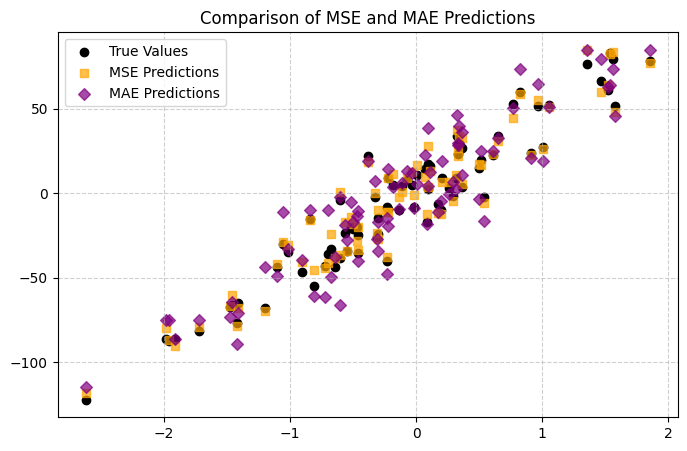

In [18]:
# Visualize MSE and MAE predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_train_reg, y_train_reg, label='True Values', color='black', marker='o')
plt.scatter(X_train_reg, y_pred_mse, label='MSE Predictions', color='orange', alpha=0.7, marker='s')
plt.scatter(X_train_reg, y_pred_mae, label='MAE Predictions', color='purple', alpha=0.7, marker='D')
plt.legend()
plt.title("Comparison of MSE and MAE Predictions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
# Huber Loss Example
huber_regressor = HuberRegressor(epsilon=1.0)
huber_regressor.fit(X_train_reg, y_train_reg)
y_pred_huber = huber_regressor.predict(X_train_reg)
huber_loss = mean_squared_error(y_train_reg, y_pred_huber)
print(f"Huber Loss: {huber_loss:.4f}")

Huber Loss: 164.3102


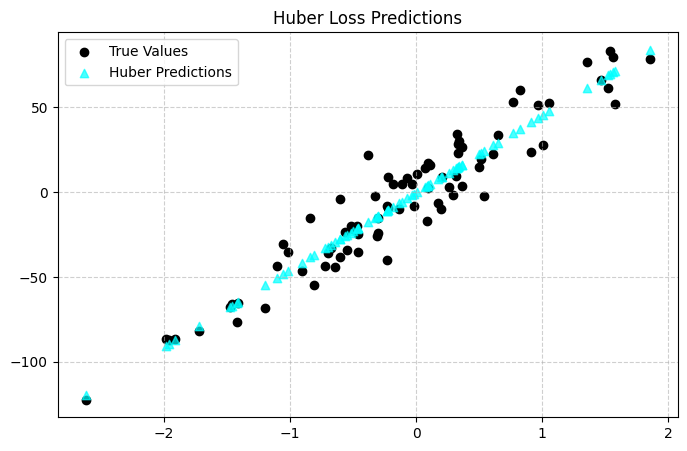

In [20]:
# Visualize Huber Loss Predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_train_reg, y_train_reg, label='True Values', color='black', marker='o')
plt.scatter(X_train_reg, y_pred_huber, label='Huber Predictions', color='cyan', alpha=0.7, marker='^')
plt.legend()
plt.title("Huber Loss Predictions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [21]:
# Generate sample classification data
X_classification, y_classification = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [22]:
# Log Loss Example
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_cls, y_train_cls)
log_loss_value = log_loss(y_train_cls, logistic_regressor.predict_proba(X_train_cls))
print(f"Log Loss: {log_loss_value:.4f}")

Log Loss: 0.1010


In [23]:
# Hinge Loss Example (for SVM)
y_train_hinge = np.where(y_train_cls == 0, -1, 1)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_cls, y_train_hinge)
hinge_loss = np.mean(np.maximum(0, 1 - y_train_hinge * svm_classifier.decision_function(X_train_cls)))
print(f"Hinge Loss: {hinge_loss:.4f}")

Hinge Loss: 0.0643


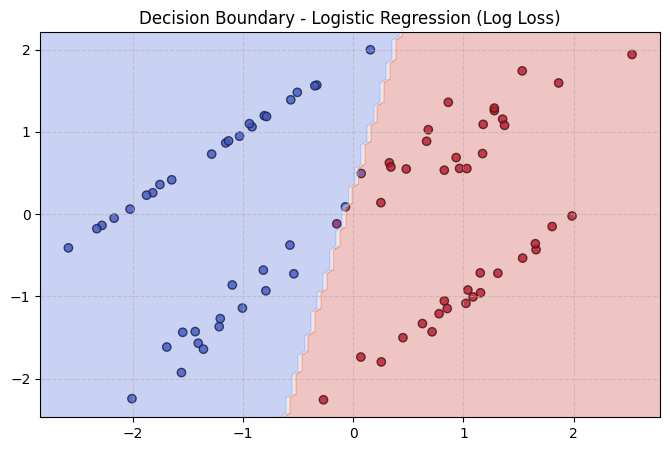

In [24]:
# Decision boundary visualization for Log Loss
plt.figure(figsize=(8, 5))
plt.scatter(X_train_cls[:, 0], X_train_cls[:, 1], c=y_train_cls, cmap='coolwarm', alpha=0.8, edgecolors='k')
xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Decision Boundary - Logistic Regression (Log Loss)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

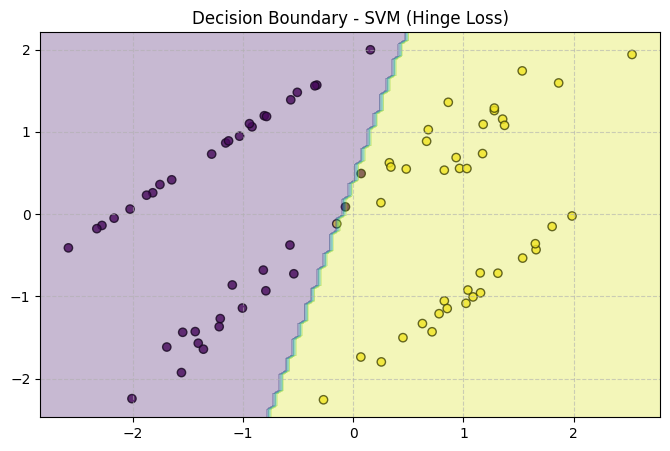

In [25]:
# Decision boundary visualization for Hinge Loss
plt.figure(figsize=(8, 5))
plt.scatter(X_train_cls[:, 0], X_train_cls[:, 1], c=y_train_hinge, cmap='viridis', alpha=0.8, edgecolors='k')
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title("Decision Boundary - SVM (Hinge Loss)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()